In [1]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%run utility_functions.ipynb

In [67]:
from qiskit_ionq import IonQProvider
provider = IonQProvider('MSZ3nHSUkWvLg4YucxMDpNDESpGqQx3i')
print(provider.backends()) 

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [50]:
def cloningcircuit(alice_bit = 0, alice_base = 0, theta1=np.pi/8):    
    
    qr = QuantumRegister(3,'q')
    cr = ClassicalRegister(3,'c')

    qc = QuantumCircuit(qr,cr)
    
    if alice_bit == 0:
        if alice_base == 0:
            pass
        else:
            qc.h(qr[0])
    elif alice_bit == 1:
        if alice_base == 0:
            qc.x(qr[0])
        else:
            qc.x(qr[0])
            qc.h(qr[0])

                
    qc.barrier()

    # theta1=theta3=np.pi/4
    # theta2 = -math.asin(0.5 - math.sqrt(2)/3) ** 0.5
#     theta2 = 0.5 * (np.arccos((np.cos(2*theta1))/(np.sin(2*theta1))))
    
    if theta1 <= np.pi/4:
        theta2 = 0.5 * np.arccos(np.cos(2*theta1)/np.sin(2*theta1))
    if theta1 > np.pi/4:
        theta2 = 0.5 * np.arccos(-np.cos(2*theta1)/np.sin(2*theta1))
        
    theta3 = np.arctan(np.tan(theta1) * np.tan(theta2))
    
#     print(theta1,theta2,theta3)
    
    #qc.sdg(y basis)
    
#     qc.u(2*theta1,0,0,qr[1])
    qc.ry(2*theta1,qr[1])
    qc.cx(qr[1],qr[2])
#     qc.u(2*theta2,0,0,qr[2])
    qc.ry(2*theta2,qr[2])
    qc.cx(qr[2],qr[1])
#     qc.u(2*theta3,0,0,qr[1])
    qc.ry(2*theta3,qr[1])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[2],qr[0])

    qc.barrier()
    
    if alice_base == 0:
        pass
    else:
        qc.h(qr[0])
        qc.h(qr[1])

    
    sim = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend=sim)
    result = job.result()
    sv = result.get_statevector()
    
    qc.measure([0,1],[0,1])
    
#     display(qc.draw(output='mpl'))
    return qc,sv

def displayresult(qc,sv,alice_bit=0,show=True,useIonQ=False):
    if not useIonQ:
        # define the backend
        backend= Aer.get_backend('qasm_simulator')
        # run the simulation
        job = execute(qc, backend=backend, shots = 1024)
        #get the result
        counts = job.result().get_counts()

    else:
        
        ionq = provider.get_backend("ionq_simulator")
        job = ionq.run(qc, backend=ionq, shots = 1024)
        counts = job.result().get_counts()
    
#     if show:
    print ("Counts:",counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/1024
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/1024
    
    print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
    if show:
#         print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
        # plot the histogram of the results
        display(plot_histogram(counts))
        display(plot_bloch_multivector(sv))
        display(array_to_latex(sv))
    
    return prob_bob, prob_alice, counts

### QASM simulator

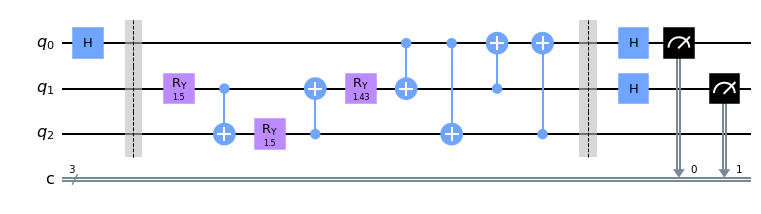

Counts: {'001': 2, '011': 2, '010': 932, '000': 1112}
The probability of Bob measuring the correct bit is  1.99609375 and the probability of Alice eavesdropping the correct bit is 1.087890625


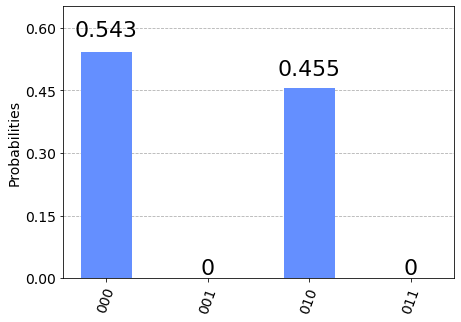

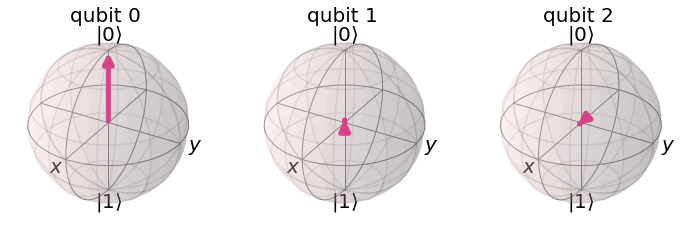

<IPython.core.display.Latex object>

(1.99609375, 1.087890625)

In [51]:
qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=0.75)
display(qc.draw(output='mpl'))
displayresult(qc,sv,alice_bit=0,useIonQ=False) 

In [39]:
theta1s = np.linspace(1.1,2.9,19)
# print(theta1s_)
theta1s = np.pi/8 * theta1s

0.4319689898685966 0.2735077475943141 0.12861598644888833
0.471238898038469 0.37875983784057626 0.2000658653012283
0.5105088062083414 0.45559817472314695 0.2678092835021161
0.5497787143782138 0.5180815686914736 0.33605734678984245
0.5890486225480862 0.5718588702012102 0.40612838223576203
0.6283185307179586 0.6199347554199618 0.4784274379389724
0.6675884388878311 0.6641746723290882 0.5529144025039936
0.7068583470577035 0.7058710510446452 0.6292696520048421
0.7461282552275759 0.7460065734118613 0.7069789058567457
0.7853981633974483 0.7853981633974483 0.7853981633974482
0.8246680715673207 0.7460065734118614 0.7852761041485031
0.8639379797371932 0.7058710510446452 0.7843984042889406
0.9032078879070654 0.6641746723290883 0.7818845151086512
0.9424777960769379 0.6199347554199618 0.7765588841925861
0.9817477042468103 0.5718588702012103 0.7666590146702976
1.0210176124166825 0.518081568691474 0.7492430956053429
1.0602875205865552 0.4555981747231471 0.7187842656757769
1.0995574287564276 0.3787598

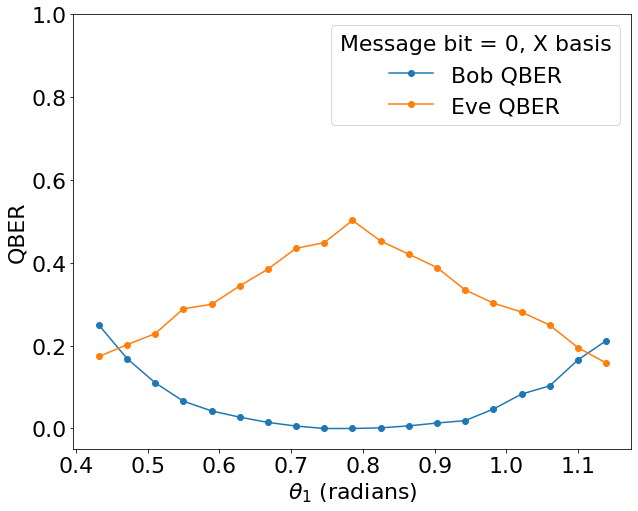

In [45]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=0,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

### IonQ simulator

0.75 0.7499109550624189 0.7146902134750834


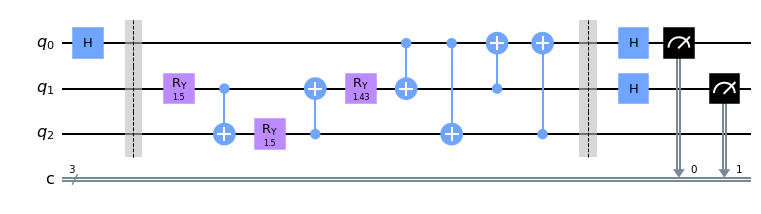

/opt/miniconda3/lib/python3.9/site-packages/qiskit_ionq/ionq_backend.py:314: UserWarning: Option backend is not used by this backend
  return super().run(circuit, **kwargs)


Counts: {'000': 576, '001': 1, '010': 445, '011': 2}
The probability of Bob measuring the correct bit is  0.9970703125 and the probability of Alice eavesdropping the correct bit is 0.5634765625


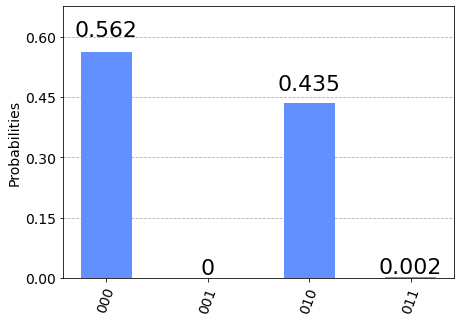

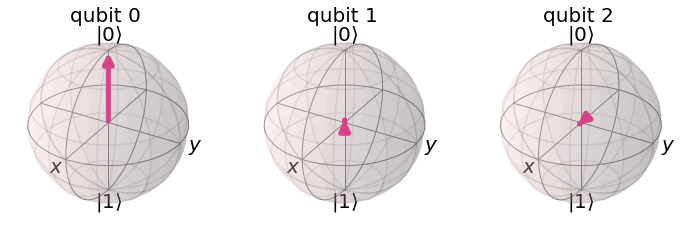

<IPython.core.display.Latex object>

(0.9970703125, 0.5634765625)

In [47]:
qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=0.75)
display(qc.draw(output='mpl'))
displayresult(qc,sv,alice_bit=0,useIonQ=True) 

/opt/miniconda3/lib/python3.9/site-packages/qiskit_ionq/ionq_backend.py:314: UserWarning: Option backend is not used by this backend
  return super().run(circuit, **kwargs)


Counts: {'000': 609, '001': 226, '010': 176, '011': 13}
The probability of Bob measuring the correct bit is  0.7666015625 and the probability of Alice eavesdropping the correct bit is 0.8154296875
Counts: {'000': 641, '001': 182, '010': 200, '011': 1}
The probability of Bob measuring the correct bit is  0.8212890625 and the probability of Alice eavesdropping the correct bit is 0.8037109375
Counts: {'000': 659, '001': 106, '010': 258, '011': 1}
The probability of Bob measuring the correct bit is  0.8955078125 and the probability of Alice eavesdropping the correct bit is 0.7470703125
Counts: {'000': 705, '001': 63, '010': 256, '011': 0}
The probability of Bob measuring the correct bit is  0.9384765625 and the probability of Alice eavesdropping the correct bit is 0.75
Counts: {'000': 632, '001': 53, '010': 337, '011': 2}
The probability of Bob measuring the correct bit is  0.9462890625 and the probability of Alice eavesdropping the correct bit is 0.6689453125
Counts: {'000': 640, '001': 2

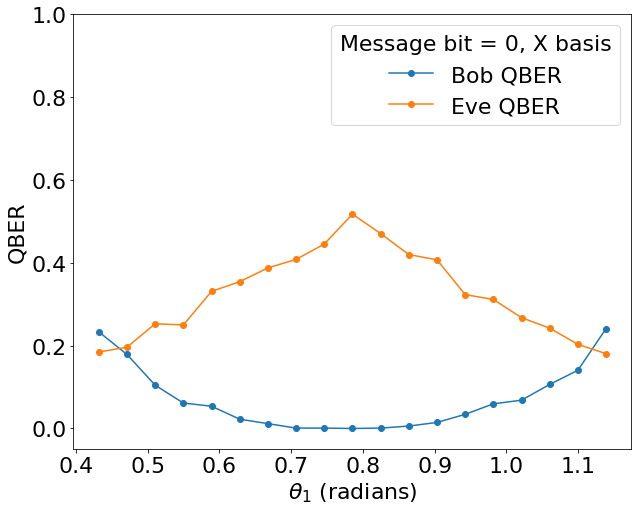

In [49]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

counts_list = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice,counts = displayresult(qc,sv,alice_bit=0,show=False,useIonQ=True)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)
    
    counts_list.append(counts)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

In [55]:
# prob_alices

### IonQ QPU

In [ ]:
from qiskit_ionq import IonQProvider
provider = IonQProvider('MSZ3nHSUkWvLg4YucxMDpNDESpGqQx3i')
print(provider.backends()) 

In [61]:
def submitjob(alice_bit=0,theta1=0.75):
    
    qc, sv = cloningcircuit(alice_bit = alice_bit, alice_base = 1, theta1=theta1)
    display(qc.draw(output='mpl'))
    ionq = provider.get_backend("ionq_qpu")
    job = ionq.run(qc, backend=ionq, shots = 1024)
    
    return job
#     counts = job.result().get_counts() 

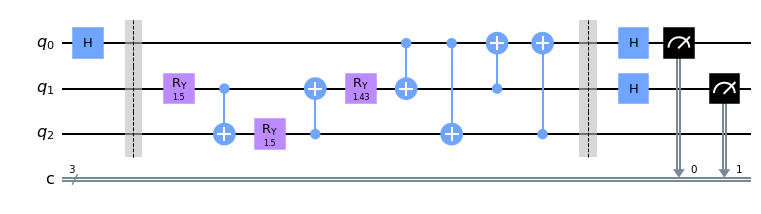

/var/folders/sj/fp0zy3yj7434w2klc5mh_6sw0000gn/T/ipykernel_25912/2575516807.py:6: UserWarning: Option backend is not used by this backend
  job = ionq.run(qc, backend=ionq, shots = 1024)


In [62]:
submitjob(alice_bit=0,theta1=0.75)

In [71]:
# if job.status() is JobStatus.DONE:
#     print("Job status is DONE")

{'000': 479, '001': 32, '010': 461, '011': 52}


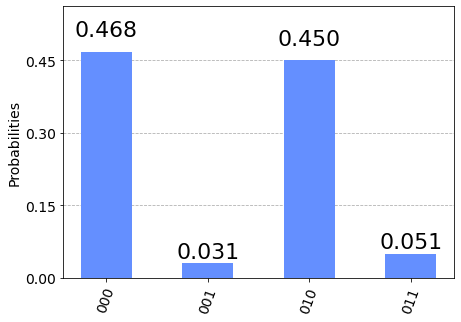

In [73]:
#687bf536-3895-459a-bb5b-4643dfe0feec
#0dda44a0-66d7-4781-a5e9-b24aeed41aef
# job_id = job.job_id()
ionq = provider.get_backend("ionq_qpu")
retrieved = ionq.retrieve_job('0dda44a0-66d7-4781-a5e9-b24aeed41aef') 
counts = retrieved.result().get_counts()
print(counts)
plot_histogram(counts)

In [80]:
theta1s = np.linspace(1.1,2.9,19)
print(theta1s)
theta1s = np.pi/8 * theta1s 

[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8
 2.9]


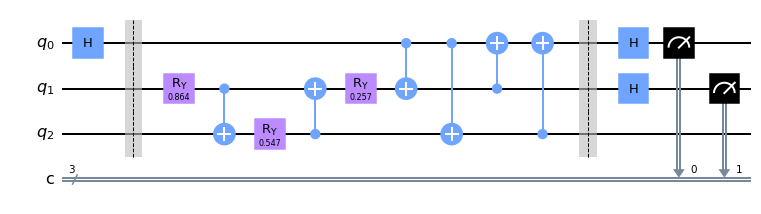

/var/folders/sj/fp0zy3yj7434w2klc5mh_6sw0000gn/T/ipykernel_25912/2575516807.py:6: UserWarning: Option backend is not used by this backend
  job = ionq.run(qc, backend=ionq, shots = 1024)


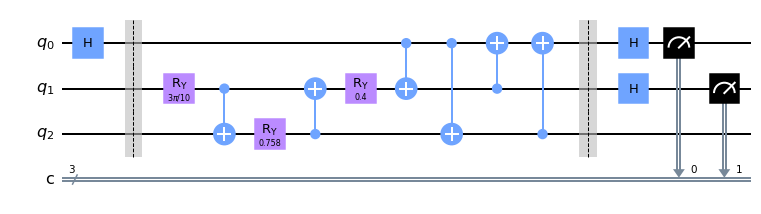

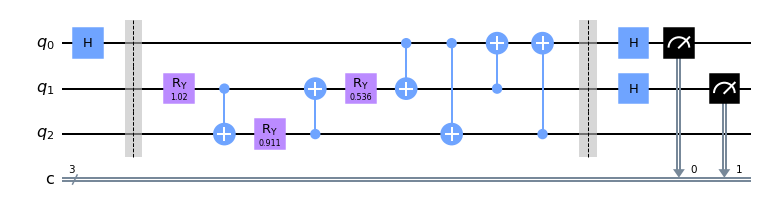

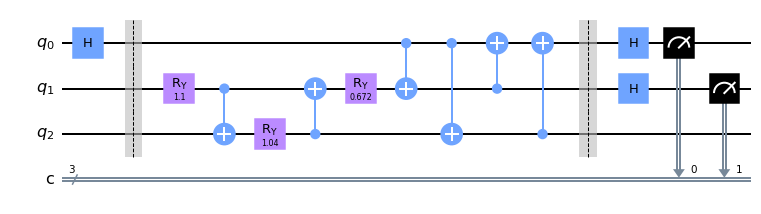

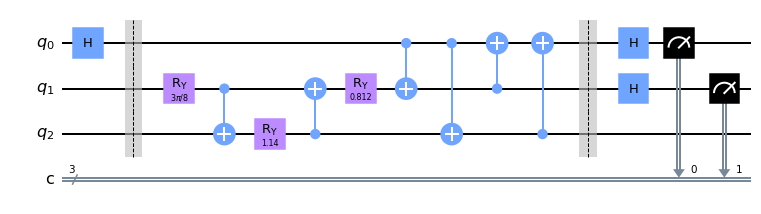

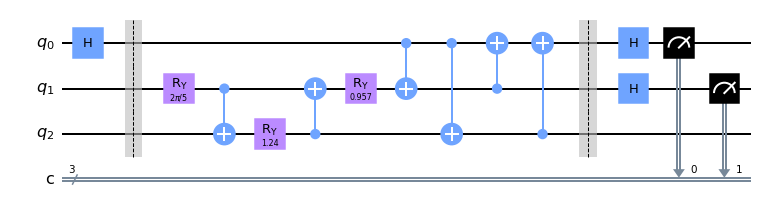

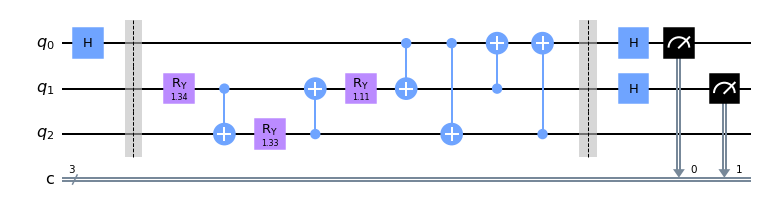

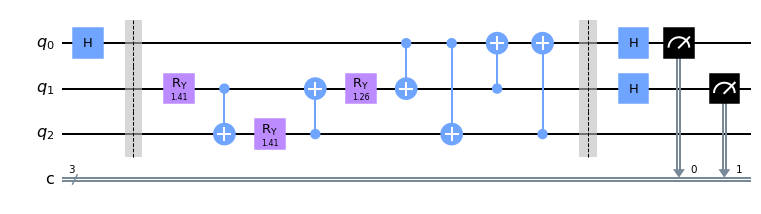

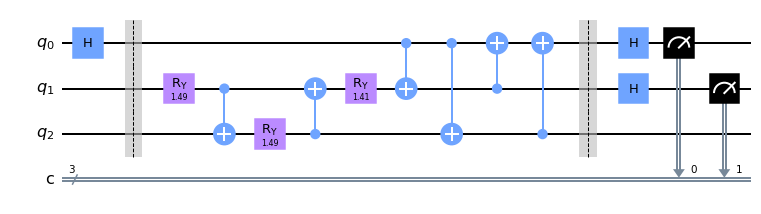

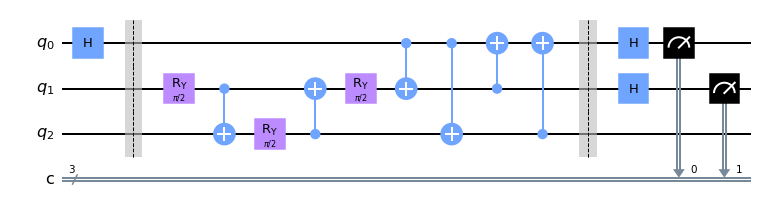

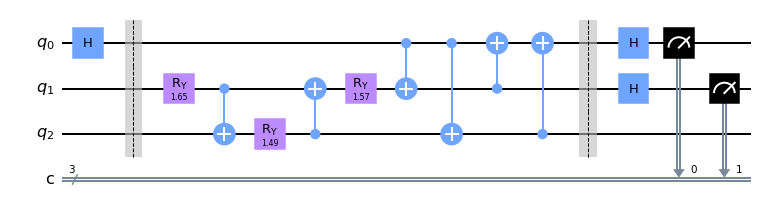

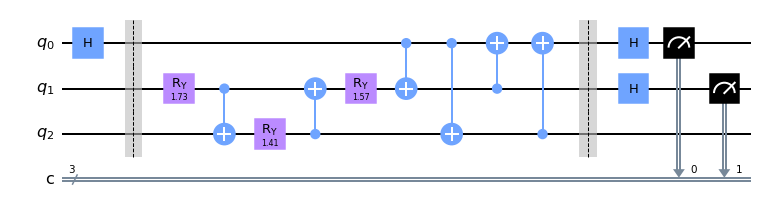

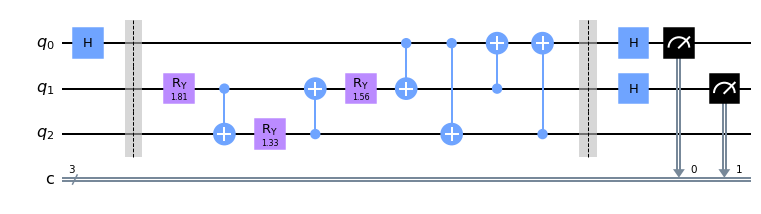

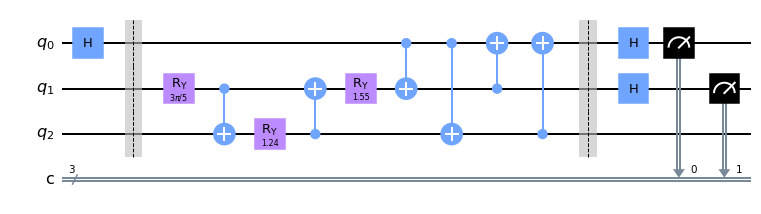

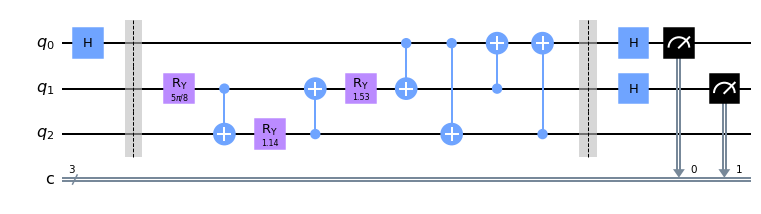

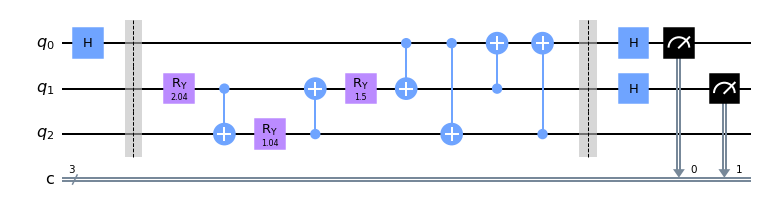

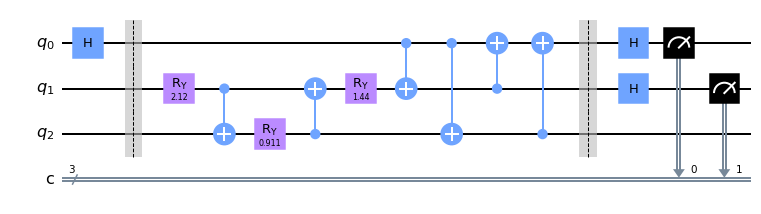

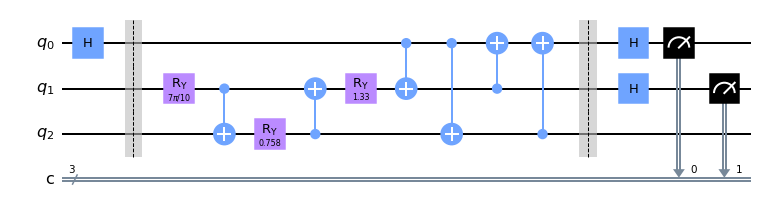

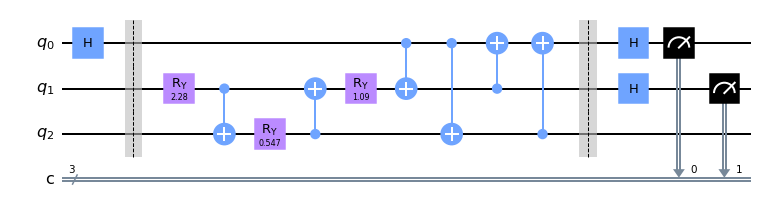

In [81]:
# store jobs in a list

jobs = []
for val in theta1s:
    job = submitjob(alice_bit=0,theta1=val)
    jobs.append(job)

In [83]:
jobs[0]

Date↓
c52d49f5-a0d5-4c94-a9ec-6550ba885a19
Untitled
ready
qpu.harmony
15:57:32 EDT 2022-07-08
aabfd2f4-a3ec-4758-9a9d-88d86f01e0bc
Untitled
ready
qpu.harmony
15:57:32 EDT 2022-07-08
4e8bc6fc-9096-41f8-87fa-a9b1c0834fe0
Untitled
ready
qpu.harmony
15:57:32 EDT 2022-07-08
0887c712-3987-4876-9ad8-77e802a0b4eb
Untitled
ready
qpu.harmony
15:57:31 EDT 2022-07-08
dcab248e-bcc8-446d-93bc-cfb728e223d9
Untitled
ready
qpu.harmony
15:57:30 EDT 2022-07-08
01762e5d-c8de-4a87-ba29-bbd66004a00f
Untitled
ready
qpu.harmony
15:57:30 EDT 2022-07-08
ac8ea995-2ccf-43db-89c9-0e6406e1e215
Untitled
ready
qpu.harmony
15:57:29 EDT 2022-07-08
39f1ecca-60e8-4812-9bd6-5c9c0d2cc381
Untitled
ready
qpu.harmony
15:57:29 EDT 2022-07-08
e25273a9-8417-45da-9721-f76a75138e90
Untitled
ready
qpu.harmony
15:57:28 EDT 2022-07-08
9cf47e46-3e39-4dbc-813e-13429b780ca3
Untitled
ready
qpu.harmony
15:57:28 EDT 2022-07-08
eaf57896-2430-4306-b8dc-d0beded5822b
Untitled
ready
qpu.harmony
15:57:27 EDT 2022-07-08
c54128d4-b1b1-4943-87e4-565b2c316d85
Untitled
ready
qpu.harmony
15:57:27 EDT 2022-07-08
6a0620c1-b635-4636-95c2-c7f172e96a9c
Untitled
ready
qpu.harmony
15:57:26 EDT 2022-07-08
1d62eea9-da5f-4748-a5a9-690e199d2add
Untitled
ready
qpu.harmony
15:57:26 EDT 2022-07-08
da519c2b-a334-4961-ac3a-63a9cb238db8
Untitled
ready
qpu.harmony
15:57:25 EDT 2022-07-08
15079295-f805-4e7c-9f2d-5cf7fb87268a
Untitled
ready
qpu.harmony
15:57:25 EDT 2022-07-08
ecf9b438-f69d-46bc-8cca-e773c86c1573
Untitled
ready
qpu.harmony
15:57:24 EDT 2022-07-08
0b0321c2-8d7c-4976-a96f-7ddba2e14dc0
Untitled
ready
qpu.harmony
15:57:24 EDT 2022-07-08
f50826ff-ce89-4a8f-b5ba-79cf301603c2
Untitled
ready
qpu.harmony
15:57:23 EDT 2022-07-08

In [106]:
ids = ['f50826ff-ce89-4a8f-b5ba-79cf301603c2', '0b0321c2-8d7c-4976-a96f-7ddba2e14dc0', 'ecf9b438-f69d-46bc-8cca-e773c86c1573', 
'15079295-f805-4e7c-9f2d-5cf7fb87268a', 'da519c2b-a334-4961-ac3a-63a9cb238db8', '1d62eea9-da5f-4748-a5a9-690e199d2add', 
'6a0620c1-b635-4636-95c2-c7f172e96a9c', 'c54128d4-b1b1-4943-87e4-565b2c316d85', 'eaf57896-2430-4306-b8dc-d0beded5822b', 
'9cf47e46-3e39-4dbc-813e-13429b780ca3', 'e25273a9-8417-45da-9721-f76a75138e90', '39f1ecca-60e8-4812-9bd6-5c9c0d2cc381', 
'ac8ea995-2ccf-43db-89c9-0e6406e1e215', '01762e5d-c8de-4a87-ba29-bbd66004a00f', 'dcab248e-bcc8-446d-93bc-cfb728e223d9', 
'0887c712-3987-4876-9ad8-77e802a0b4eb', '4e8bc6fc-9096-41f8-87fa-a9b1c0834fe0', 'aabfd2f4-a3ec-4758-9a9d-88d86f01e0bc',
'c52d49f5-a0d5-4c94-a9ec-6550ba885a19']

len(ids)


19

In [108]:
def getjobresult(id = "",alice_bit=0):
    ionq = provider.get_backend("ionq_qpu")
    retrieved = ionq.retrieve_job(id) 
    counts = retrieved.result().get_counts()
#     print(counts)
#     plot_histogram(counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/1024
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/1024

        err_bob = 1 - prob_bob
        err_alice = 1 - prob_alice
            
    return prob_bob, prob_alice, err_bob, err_alice, counts

In [109]:
# getjobresult(id = ids[17],alice_bit=0)

err_bob_list = []
err_alice_list = []

for i in range(len(ids)):
    prob_bob, prob_alice, err_bob, err_alice, counts = getjobresult(id = ids[i],alice_bit=0)
    print(i, prob_bob, prob_alice, err_bob, err_alice, counts)
    
    err_bob_list.append(err_bob)
    err_alice_list.append(err_alice)

0 0.6630859375 0.806640625 0.3369140625 0.193359375 {'000': 552, '001': 274, '010': 127, '011': 71}
1 0.7734375 0.767578125 0.2265625 0.232421875 {'000': 603, '001': 183, '010': 189, '011': 49}
2 0.8203125 0.7734375 0.1796875 0.2265625 {'000': 640, '001': 152, '010': 200, '011': 32}
3 0.8876953125 0.740234375 0.1123046875 0.259765625 {'000': 673, '001': 85, '010': 236, '011': 30}
4 0.873046875 0.7822265625 0.126953125 0.2177734375 {'000': 698, '001': 103, '010': 196, '011': 27}
5 0.904296875 0.7236328125 0.095703125 0.2763671875 {'000': 676, '001': 65, '010': 250, '011': 33}
6 0.93359375 0.693359375 0.06640625 0.306640625 {'000': 663, '001': 47, '010': 293, '011': 21}
7 0.935546875 0.638671875 0.064453125 0.361328125 {'000': 616, '001': 38, '010': 342, '011': 28}
8 0.943359375 0.650390625 0.056640625 0.349609375 {'000': 641, '001': 25, '010': 325, '011': 33}
9 0.9443359375 0.59765625 0.0556640625 0.40234375 {'000': 587, '001': 25, '010': 380, '011': 32}
10 0.9150390625 0.5400390625 0.0

In [114]:
probbob_theory = []
probalice_theory = []
errbob_theory = []
erralice_theory = []

for val in theta1s:
    probbob_theory.append(0.5 * (1 + np.sin(2 * val)))
    probalice_theory.append(0.5 * (1 + np.abs(np.cos(2 * val))))
    errbob_theory.append(1 - (0.5 * (1 + np.sin(2 * val))))
    erralice_theory.append(1 - (0.5 * (1 + np.abs(np.cos(2 * val)))))
    
# probbob_theory
# probalice_theory

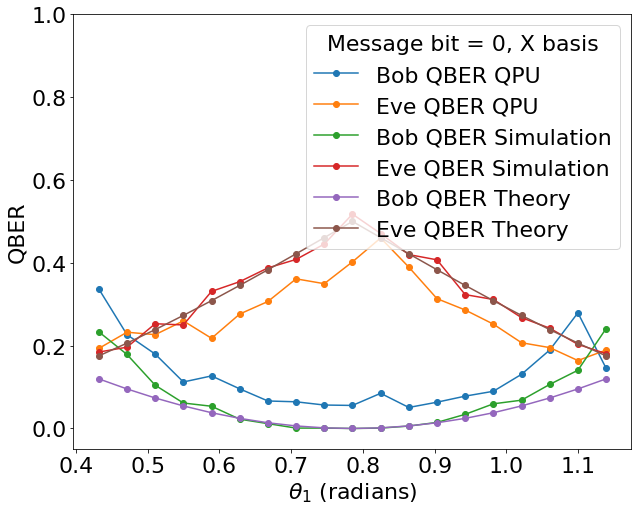

In [115]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bob_list,"-o",label="Bob QBER QPU")
plt.plot(theta1s,err_alice_list,"-o",label="Eve QBER QPU")

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER Simulation")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER Simulation")


plt.plot(theta1s,errbob_theory,"-o",label="Bob QBER Theory")
plt.plot(theta1s,erralice_theory,"-o",label="Eve QBER Theory")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

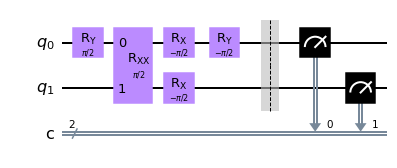

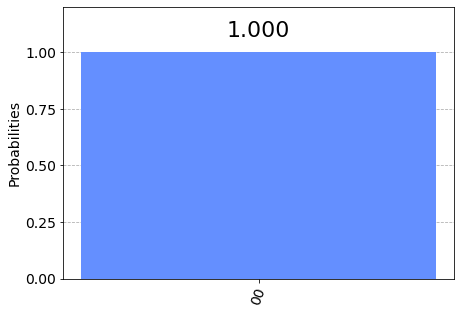

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-15203 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


QiskitError: 'Data for experiment "circuit-15203" could not be found.'

In [129]:
qc = QuantumCircuit(2, 2)

qc.ry(np.pi/2,0)
qc.rxx(np.pi/2,0,1)
qc.rx(-np.pi/2,0)
qc.rx(-np.pi/2,1)
qc.ry(-np.pi/2,0)
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)

display(qc.draw(output='mpl')) 

shots = 1000 # number of samples used for statistics
sim = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = sim, shots = shots)
result = job.result()
display(plot_histogram(job.result().get_counts())) 

backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
uni = result.get_unitary(qc, decimals=3)
display(array_to_latex(uni))

backend = provider.get_backend('ionq_simulator')
job = execute(qc, backend=backend, shots = shots)
display(plot_histogram(job.result().get_counts()))

In [127]:
uni = result.get_unitary(qc, decimals=3)
display(array_to_latex(uni))

QiskitError: 'No unitary for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x1931b2bb0>"'

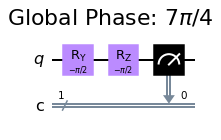

In [79]:
#### Transpilation of circuits

from qiskit import QuantumCircuit, transpile
from math import pi
ionq_sim = provider.get_backend("ionq_simulator")

qc2 = QuantumCircuit(1, 1)
qc2.u(pi/2, pi/2, pi, 0)
qc2.measure(0,0)
transpiled_circuit = transpile(qc2, ionq_sim)
display(transpiled_circuit.draw(output='mpl'))